In [2]:
#Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
import pickle 
import pylab as pl  
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Leitura dos dados
df = pd.read_csv("2class_1.csv",encoding='latin-1',sep = ';')

In [ ]:
print(df.shape) # tamanho
df.head(5) # head

(1246, 9)
False


,CPA,ID,Atrito,macrotextura,Remoção de borracha,Terço da pista,Localização na Pista (m),mês,classificação
0,0,0,0.64,0.62,1,1,100,2,0
1,0,1,0.76,0.69,1,1,100,5,0
2,0,2,0.64,0.62,1,1,100,8,0
3,0,3,0.62,0.79,0,1,100,11,0
4,0,4,0.78,0.88,1,1,100,2,1


In [ ]:
variaveis_usadas = {'CPA': 'CPA','Atrito': 'atrito','macrotextura': 'macrotextura','Remoção de borracha': 'borracha','Terço da pista': 'terço','Localização na Pista (m)': 'local','classificação': 'class'}
df = df.rename(columns=variaveis_usadas)[[*variaveis_usadas.values()]] # Renomear e escolher variáveis 
df.head(5)

,CPA,atrito,macrotextura,borracha,terço,local,class
0,0,0.64,0.62,1,1,100,0
1,0,0.76,0.69,1,1,100,0
2,0,0.64,0.62,1,1,100,0
3,0,0.62,0.79,0,1,100,0
4,0,0.78,0.88,1,1,100,1


In [ ]:
#filtrar outliers
df = df[df["atrito"]>0]

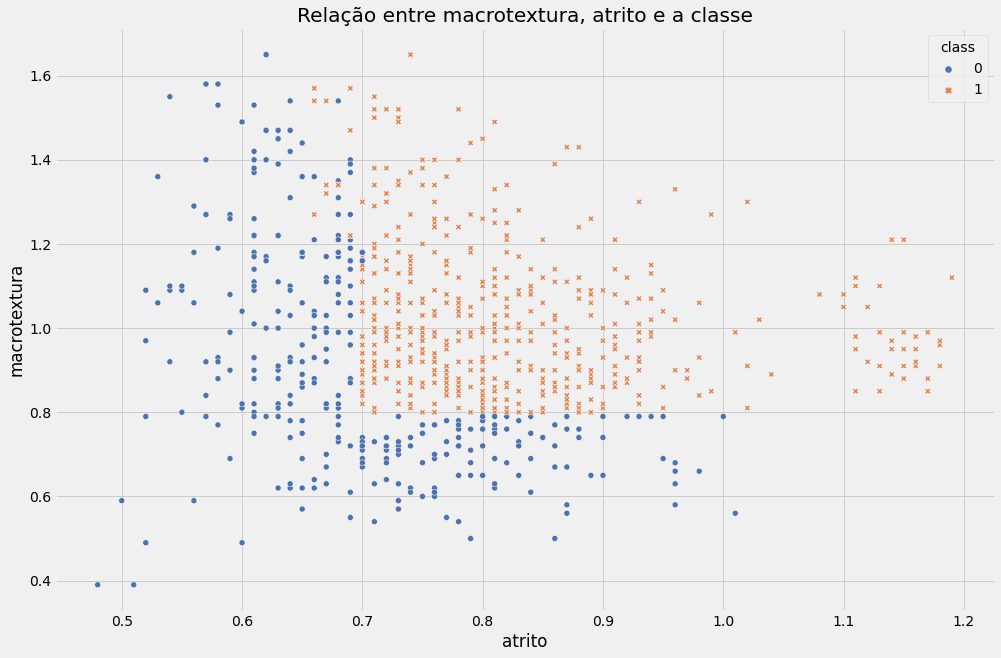

In [ ]:
# Plots
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df, x="atrito", y="macrotextura", hue = "class", style="class", palette="deep")
plt.title('Relação entre macrotextura, atrito e a classe')
plt.show()

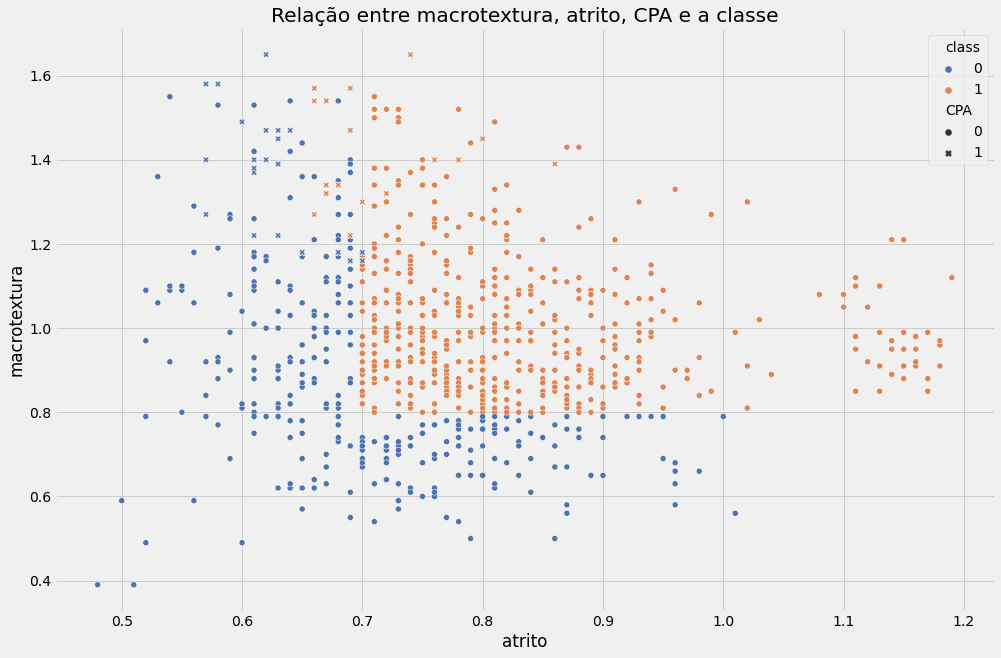

In [ ]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df, x="atrito", y="macrotextura", hue = "class", style="CPA", palette="deep")
plt.title('Relação entre macrotextura, atrito, CPA e a classe')
plt.show()

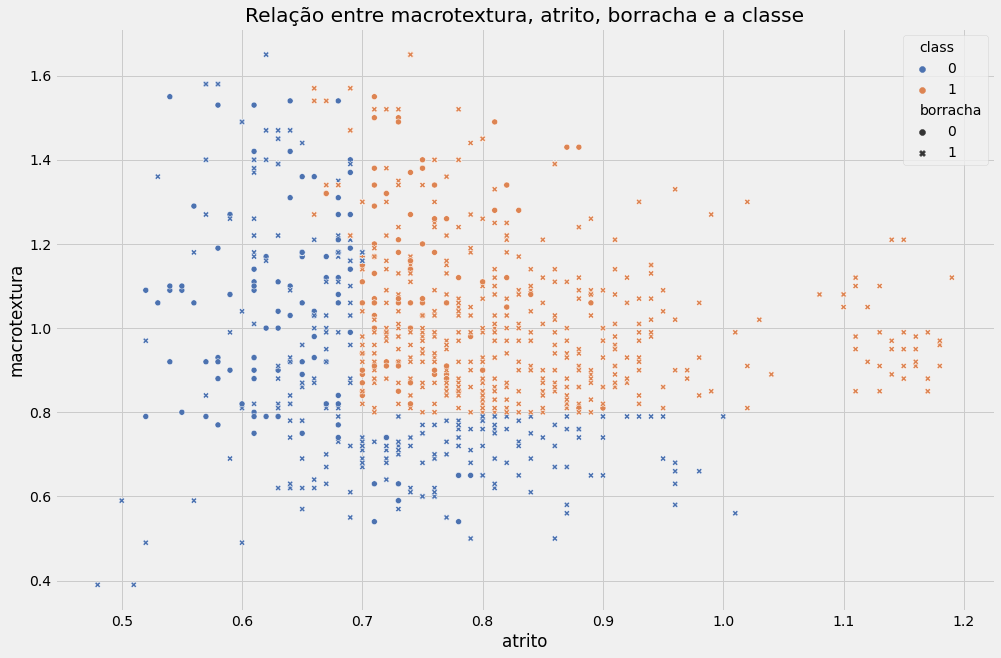

In [ ]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df, x="atrito", y="macrotextura", hue = "class", style="borracha", palette="deep")
plt.title('Relação entre macrotextura, atrito, borracha e a classe')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


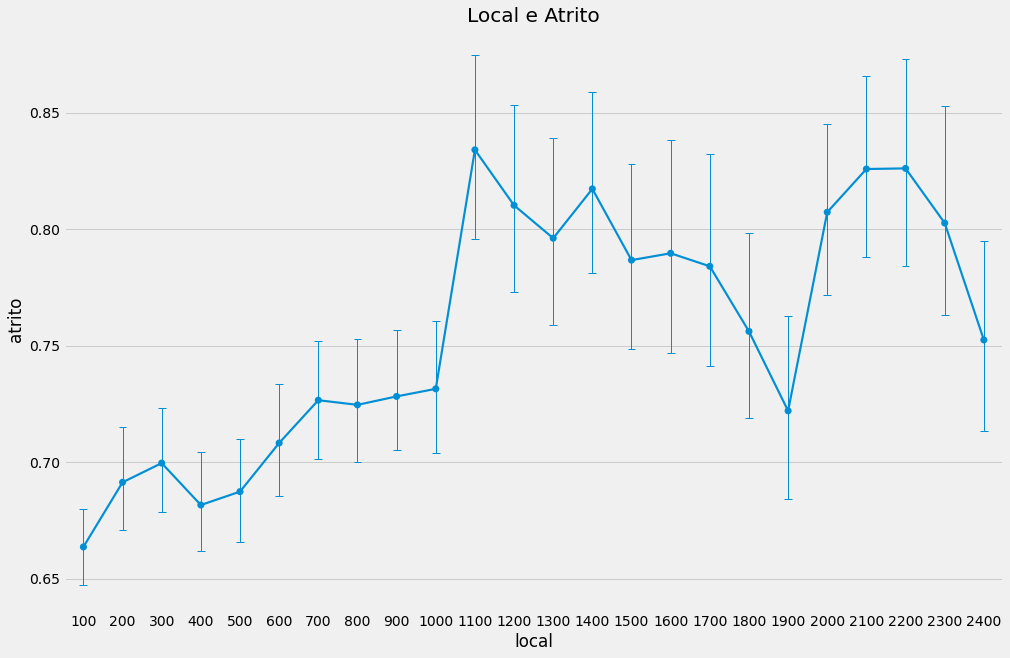

In [ ]:
plt.figure(figsize=(15, 10))
ax = sns.pointplot("local", 'atrito', 
    data=df, errorbar="ci",scale = 0.3,   capsize=.2, aspect=2, errwidth=1)
plt.title('Local e Atrito')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


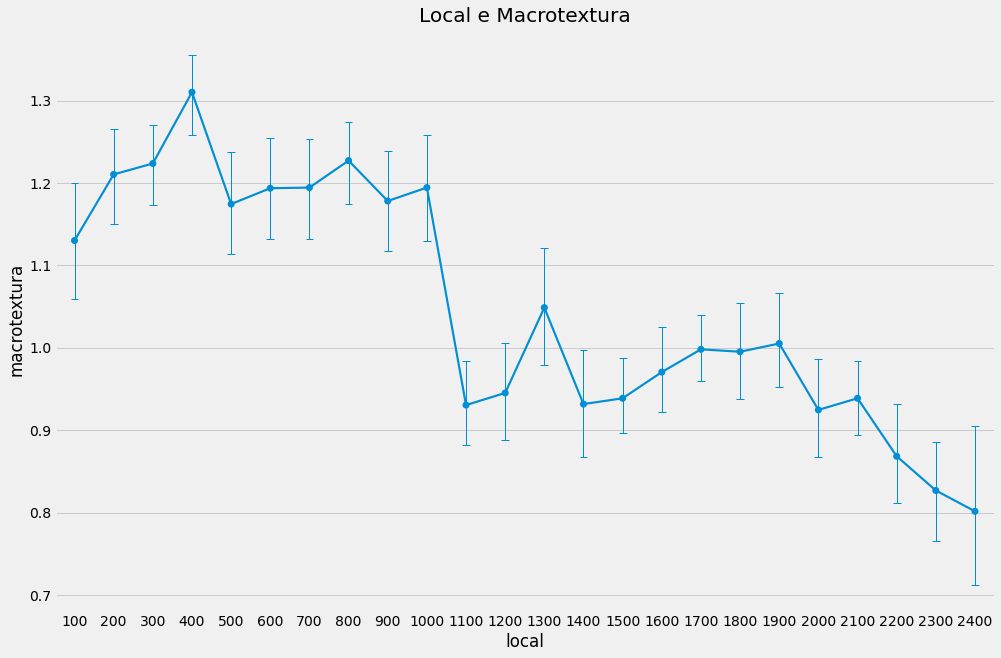

In [ ]:
plt.figure(figsize=(15, 10))
ax = sns.pointplot("local", 'macrotextura', 
    data=df, errorbar="ci",scale = 0.3,   capsize=.2, aspect=2, errwidth=1)
plt.title('Local e Macrotextura')
plt.show()

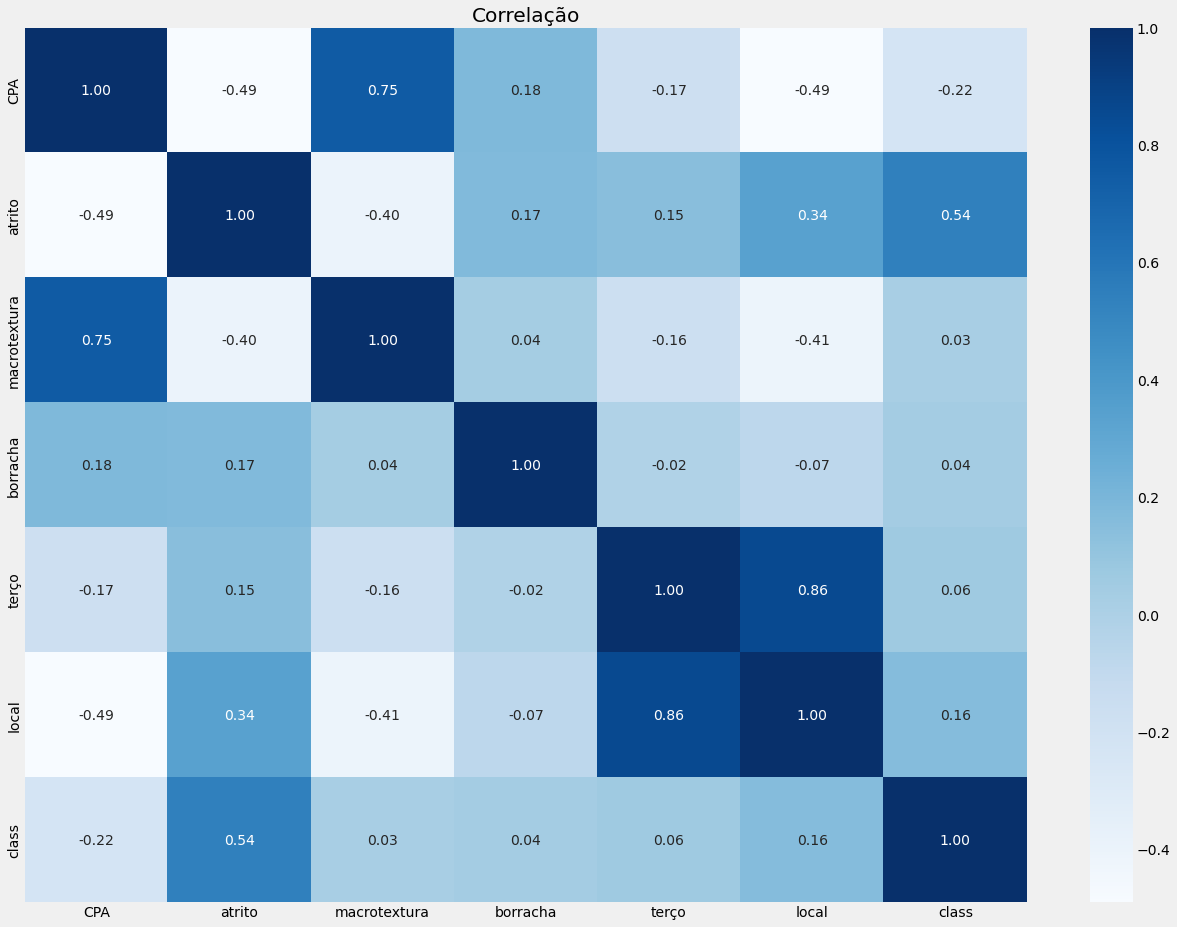

In [ ]:
# Correlação mat.
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação')
plt.show()

In [ ]:
#Distribuição dos dados nas classes
num_true = len(df.loc[df['class'] == 1])
num_false = len(df.loc[df['class'] == 0])

print("class1:{0} ({1:2.2f}%)".format(num_true,(num_true/(num_true + num_false))*100))
print("class0:{0} ({1:2.2f}%)".format(num_false,(num_false/(num_true + num_false))*100))

class1:664 (53.63%)
class0:574 (46.37%)


In [ ]:
#Variáveis indepedentes usadas para o modelo final
atributos = ['CPA','borracha','local']

#Variável depedente usada
atrib_prev = ['class']

x = df[atributos].values
y = df[atrib_prev].values

In [ ]:
#Dados de treino e teste
split_test_size = 0.30 # 30% para teste e 70% para treino (mais comum)
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = split_test_size, random_state = 42)
print("{0:0.2f}% nos dados de treino".format((len(x_treino)/len(df.index))*100))
print("{0:0.2f}% nos dados de teste".format((len(x_teste)/len(df.index))*100))

69.95% nos dados de treino
30.05% nos dados de teste


In [ ]:
#Verificação proporção das classes nos dados entre os grupos de treino e teste
print("Original True: {0} ({1:0.2f}%)".format(len(df.loc[df['class'] == 1]),(len(df.loc[df['class'] ==1])/len(df.index)*100)))
print("Original False: {0} ({1:0.2f}%)".format(len(df.loc[df['class'] == 0]),(len(df.loc[df['class'] == 0])/len(df.index)*100)))
print("Training True: {0} ({1:0.2f}%)".format(len(y_treino[y_treino[:] == 1]),(len(y_treino[y_treino[:] ==1])/len(y_treino)*100)))
print("Training False: {0} ({1:0.2f}%)".format(len(y_treino[y_treino[:] == 0]),(len(y_treino[y_treino[:] ==0])/len(y_treino)*100)))
print("Test True: {0} ({1:0.2f}%)".format(len(y_teste[y_teste[:] == 1]),(len(y_teste[y_teste[:] ==1])/len(y_teste)*100)))
print("Test False: {0} ({1:0.2f}%)".format(len(y_teste[y_teste[:] == 0]),(len(y_teste[y_teste[:] ==0])/len(y_teste)*100)))

Original True: 664 (53.63%)
Original False: 574 (46.37%)
Training True: 469 (54.16%)
Training False: 397 (45.84%)
Test True: 195 (52.42%)
Test False: 177 (47.58%)


In [ ]:
# Modelo Logístico (logit)
modelo_v3 = LogisticRegression(C = 0.7, random_state = 42)
modelo_v3.fit(x_treino, y_treino.ravel())

lr_predict_test = modelo_v3.predict(x_teste)

In [ ]:
print(modelo_v3.coef_)
print(modelo_v3.intercept_)
print(modelo_v3.score(x_teste, y_teste))
print(metrics.precision_score(y_teste, lr_predict_test))
print(metrics.r2_score(y_teste, lr_predict_test))

[[-9.26038164e-01  3.77264127e-01  1.65224473e-04]]
[0.04875992]
0.5967741935483871
0.5941422594142259
-0.6166883963494134


In [ ]:
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(y_teste, lr_predict_test)))
print("Classification Report")
print(metrics.classification_report(y_teste, lr_predict_test, labels = [1,0]))
#Mat. de confusão das previsões
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_teste, lr_predict_test, labels = [1,0])))
print("")

Exatidão (Accuracy): 0.5968
Classification Report
              precision    recall  f1-score   support

           1       0.59      0.73      0.65       195
           0       0.60      0.45      0.52       177

    accuracy                           0.60       372
   macro avg       0.60      0.59      0.59       372
weighted avg       0.60      0.60      0.59       372

Confusion Matrix
[[142  53]
 [ 97  80]]



0.5900912646675358


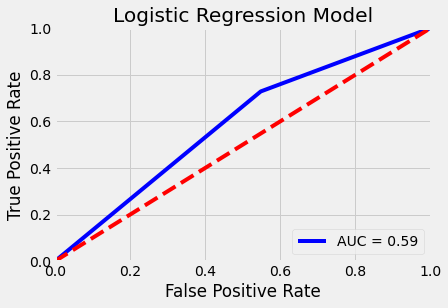

RMSE: 0.6350006350009525


In [ ]:
fpr, tpr, threshold = metrics.roc_curve(y_teste, lr_predict_test)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)
plt.title('Logistic Regression Model')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

rmse = sqrt(mean_squared_error(y_teste, lr_predict_test))
print("RMSE:", rmse)


In [ ]:
# naivebayes

modelo_v1 = GaussianNB()

In [ ]:
# treinando o modelo
modelo_v1.fit(x_treino, y_treino.ravel())

GaussianNB()

In [ ]:
# verificando métricas
nb_predict_train = modelo_v1.predict(x_treino)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(y_treino, nb_predict_train)))


Exatidão (Accuracy): 0.6293


Exatidão (Accuracy): 0.6183
-0.6166883963494134
0.6132116471099522


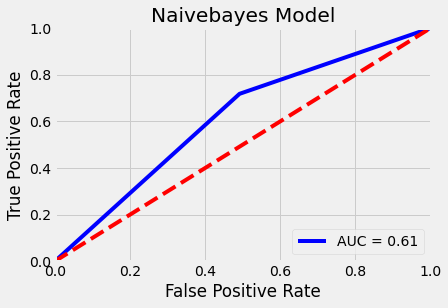

RMSE: 0.6178352774870717


In [ ]:
# validação dos modelos com os dados de teste
nb_predict_test = modelo_v1.predict(x_teste)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(y_teste, nb_predict_test)))
print(metrics.r2_score(y_teste, lr_predict_test))

fpr, tpr, threshold = metrics.roc_curve(y_teste, nb_predict_test)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)
plt.title('Naivebayes Model')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

rmse = sqrt(mean_squared_error(y_teste, nb_predict_test))
print("RMSE:", rmse)

In [ ]:
# mat. de confusão
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_teste, nb_predict_test, labels = [1,0])))
print("")
print("Classification Report")
print(metrics.classification_report(y_teste, nb_predict_test, labels = [1,0]))

Confusion Matrix
[[140  55]
 [ 87  90]]

Classification Report
              precision    recall  f1-score   support

           1       0.62      0.72      0.66       195
           0       0.62      0.51      0.56       177

    accuracy                           0.62       372
   macro avg       0.62      0.61      0.61       372
weighted avg       0.62      0.62      0.61       372



In [ ]:
modelo_v2 = RandomForestClassifier(random_state = 42)
modelo_v2.fit(x_treino, y_treino.ravel())

RandomForestClassifier(random_state=42)

In [ ]:
#Verificando os dados de treino
rf_predict_train = modelo_v2.predict(x_treino)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(y_treino, rf_predict_train)))

Exatidão (Accuracy): 0.6928


Exatidão (Accuracy): 0.6129
0.6104302477183833


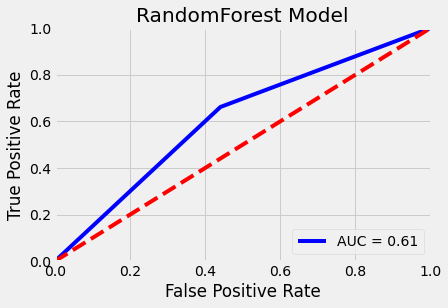

RMSE: 0.6221710168382552


In [ ]:
#Verificando nos dados de teste
rf_predict_test = modelo_v2.predict(x_teste)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(y_teste, rf_predict_test)))

fpr, tpr, threshold = metrics.roc_curve(y_teste, rf_predict_test)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)
plt.title('RandomForest Model')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

rmse = sqrt(mean_squared_error(y_teste, rf_predict_test))
print("RMSE:", rmse)

In [ ]:
#Confusion matrix
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_teste, rf_predict_test, labels = [1,0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_teste, rf_predict_test, labels = [1,0]))

Confusion Matrix
[[129  66]
 [ 78  99]]

Classification Report
              precision    recall  f1-score   support

           1       0.62      0.66      0.64       195
           0       0.60      0.56      0.58       177

    accuracy                           0.61       372
   macro avg       0.61      0.61      0.61       372
weighted avg       0.61      0.61      0.61       372



In [ ]:
# Mostrar importância das variáveis
importances = list(modelo_v2.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(atributos, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: local                Importance: 0.71
Variable: CPA                  Importance: 0.23
Variable: borracha             Importance: 0.06


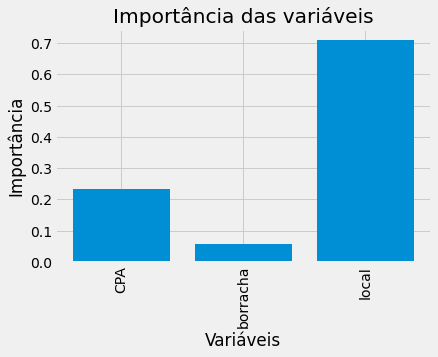

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, atributos, rotation='vertical')
plt.ylabel('Importância'); plt.xlabel('Variáveis'); plt.title('Importância das variáveis');

In [ ]:
#kmeans pelo python, no fim usei no R por ser mais fácil de gerar os gráficos
atributos = ['CPA','atrito','macrotextura','borracha','local']
atrib_prev = ['class']

x = df[atributos].values
y = df[atrib_prev].values

In [ ]:
data = x
inertias = []

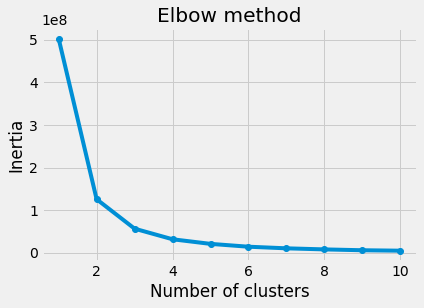

In [ ]:
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

df["kmeans"] = kmeans.labels_

In [ ]:
pd.crosstab(index=df['class'], columns=df['kmeans'])

kmeans,0,1
class,,
0,428,146
1,406,258


In [ ]:
#Salvar o data frame final para uso no R
df.to_csv('out.csv')